In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline

In [2]:
# read excel file 
x1 = pd.ExcelFile('lendingClub2.xls')
data = x1.parse("Cleansed_Data_20180420")

# display the first 5 rows
data.head()

,Loan_Amnt,annual_inc,dti,Grade_Ord,Emp_Length_Ord,Home_Own_Mortage,Home_Rent_Other,Verification_Status_Yes,Verification_Status_No,Term_36,...,Delinq_2Yrs_No,Years_Since_CR_Line,mths_since_last_delinq,revol_bal,revol_util,open_acc,total_acc,pub_rec,pub_rec_bankruptcies,Loan_Status_Final
0,5000,24000.0,27.65,2,10.0,0,1,1,0,1,...,1,26,0,13648,83.7,3,9,0,0,0
1,2500,30000.0,1.00,3,0.5,0,1,1,0,0,...,1,12,0,1687,9.4,3,4,0,0,1
2,2400,12252.0,8.72,3,10.0,0,1,0,1,1,...,1,10,0,2956,98.5,2,10,0,0,0
3,10000,49200.0,20.00,3,10.0,0,1,1,0,1,...,1,15,35,5598,21.0,10,37,0,0,0
4,3000,80000.0,17.94,2,1.0,0,1,1,0,0,...,1,15,38,27783,53.9,15,38,0,0,0


In [3]:
#[str(r) for r in data.columns.values]
len(data.columns.values)

37

In [3]:
from sklearn.preprocessing import StandardScaler

y = data.Loan_Status_Final.values
X = data.drop(['Loan_Status_Final', 'Purpose'], axis=1)

ScaledX = StandardScaler().fit_transform(X)

In [4]:
from sklearn.feature_selection import SelectPercentile, f_classif

# #############################################################################
# Univariate feature selection with F-test for feature scoring
# We use the default selection function: the 20% most significant features

X_indices = np.arange(X.shape[-1])
selector = SelectPercentile(f_classif, percentile=50)
selector.fit(ScaledX, y)

SelectPercentile(percentile=50,
         score_func=<function f_classif at 0x000000000E140668>)

In [38]:
# def replaceZeroes(data):
#   min_nonzero = np.min(data[np.nonzero(data)])
#   data[data == 0] = min_nonzero
#   return data

# scores = -np.log10(replaceZeroes(selector.pvalues_))
# scores /= scores.max()

# print(scores)
# print(np.where(scores > 0.3))

# plt.figure(figsize=(10,6))
# plt.bar(X_indices - .45, scores, width=.3,
#         label=r'Univariate score ($-Log(p_{value})$)', color='darkorange',
#         edgecolor='black')

In [5]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, RandomOverSampler

In [6]:
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

sm = SMOTE(random_state=12, ratio = 'minority')
X_train_res, y_train_res = sm.fit_sample(ScaledX, y)

rf = RandomForestClassifier(n_estimators=25, n_jobs=-1, random_state=42)
param_grid = {'max_features':['sqrt', 'log2'],'max_depth': np.arange(25, 30)}

grid = GridSearchCV(rf, param_grid, cv=10)
grid.fit(X_train_res,y_train_res)

C:\Users\Rajan\Anaconda2\envs\lendingClub\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Rajan\Anaconda2\envs\lendingClub\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': ['sqrt', 'log2'], 'max_depth': array([25, 26, 27, 28, 29])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [7]:
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.888898575995
{'max_features': 'sqrt', 'max_depth': 27}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=27, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)


In [11]:
print grid.grid_scores_

[mean: 0.88264, std: 0.08016, params: {'max_features': 'sqrt', 'max_depth': 25}, mean: 0.88264, std: 0.08016, params: {'max_features': 'log2', 'max_depth': 25}, mean: 0.88711, std: 0.07926, params: {'max_features': 'sqrt', 'max_depth': 26}, mean: 0.88711, std: 0.07926, params: {'max_features': 'log2', 'max_depth': 26}, mean: 0.88890, std: 0.07783, params: {'max_features': 'sqrt', 'max_depth': 27}, mean: 0.88890, std: 0.07783, params: {'max_features': 'log2', 'max_depth': 27}, mean: 0.88806, std: 0.07985, params: {'max_features': 'sqrt', 'max_depth': 28}, mean: 0.88806, std: 0.07985, params: {'max_features': 'log2', 'max_depth': 28}, mean: 0.88609, std: 0.08084, params: {'max_features': 'sqrt', 'max_depth': 29}, mean: 0.88609, std: 0.08084, params: {'max_features': 'log2', 'max_depth': 29}]


In [10]:
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print grid_mean_scores

[0.6660418482999129, 0.6660418482999129, 0.6792792792792792, 0.6792792792792792, 0.6811537343795409, 0.6811537343795409, 0.6991572217378669, 0.6991572217378669, 0.7118715489683232, 0.7118715489683232, 0.723539668700959, 0.723539668700959, 0.7422260970648067, 0.7422260970648067, 0.7558558558558559, 0.7558558558558559, 0.7674658529497239, 0.7674658529497239, 0.7824905550712002, 0.7824905550712002, 0.794739901191514, 0.794739901191514, 0.8071200232490555, 0.8071200232490555, 0.8186283057250799, 0.8186283057250799, 0.8298023830281894, 0.8298023830281894, 0.8393054344667248, 0.8393054344667248, 0.8478494623655914, 0.8478494623655914, 0.8529642545771579, 0.8529642545771579, 0.861057832025574, 0.861057832025574, 0.8679453647195583, 0.8679453647195583, 0.8715344376634699, 0.8715344376634699, 0.8766928218541121, 0.8766928218541121, 0.880514385353095, 0.880514385353095, 0.8826358616681197, 0.8826358616681197, 0.8871113048532403, 0.8871113048532403, 0.8888985759953502, 0.8888985759953502, 0.88805

In [8]:
from sklearn.ensemble import RandomForestClassifier
sm = SMOTE(random_state=12, ratio = 'minority')
X_train_res, y_train_res = sm.fit_sample(ScaledX, y)
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, random_state=42)

clf = RandomForestClassifier(n_estimators=25, max_features='sqrt', max_depth=27)

clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=27, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

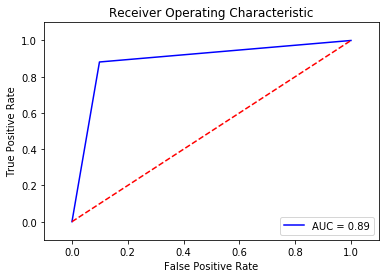

In [9]:
from sklearn import metrics
y_pred = clf.predict(X_test)

false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [57]:
print y_test[1:50]
print y_pred[1:50]

[0 1 0 0 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0
 1 0 1 1 1 0 0 1 1 0 0 1]
[0 1 0 0 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0
 1 0 1 1 1 0 0 1 0 0 0 0]


In [58]:
print metrics.confusion_matrix(y_test, y_pred)

[[7679  889]
 [ 926 7711]]


C:\Users\Rajan\Anaconda2\envs\lendingClub\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


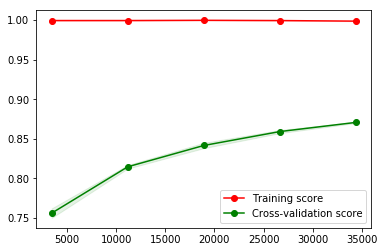

In [10]:
from sklearn.learning_curve import learning_curve

train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")

In [34]:
predicted_probas = clf.predict_proba(X_test)
predicted_probas

array([[0.78      , 0.22      ],
       [0.9521746 , 0.0478254 ],
       [0.04431108, 0.95568892],
       ...,
       [0.29054078, 0.70945922],
       [0.71692308, 0.28307692],
       [0.16      , 0.84      ]])

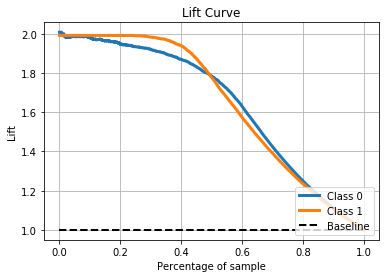

In [37]:
import scikitplot as skplt
skplt.metrics.plot_lift_curve(y_test, predicted_probas)
plt.show()

Feature ranking:
Feature Grade_Ord (0.191015)
Feature Emp_Length_Ord (0.084509)
Feature annual_inc (0.077171)
Feature open_acc (0.074166)
Feature Years_Since_CR_Line (0.073566)
Feature revol_util (0.070949)
Feature Loan_Amnt (0.065355)
Feature total_acc (0.063465)
Feature dti (0.062995)
Feature revol_bal (0.060795)
Feature mths_since_last_delinq (0.033705)
Feature Term_36 (0.015846)
Feature Term_60 (0.011938)
Feature Verification_Status_Yes (0.010428)
Feature Home_Rent_Other (0.010034)
Feature P_debt_consolidation (0.009849)
Feature Verification_Status_No (0.009654)
Feature Home_Own_Mortage (0.009394)
Feature P_small_business (0.008015)
Feature P_credit_card (0.006949)
Feature P_other (0.006815)
Feature pub_rec (0.005554)
Feature Delinq_2Yrs_No (0.005165)
Feature P_home_improvement (0.004972)
Feature Delinq_2Yrs_Yes (0.004827)
Feature P_major_purchase (0.003792)
Feature pub_rec_bankruptcies (0.003430)
Feature P_car (0.003421)
Feature P_wedding (0.002740)
Feature P_moving (0.002481)
Fea

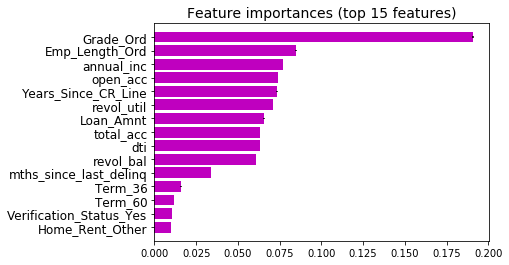

In [16]:
# get feature importance scores from the best random forest model
feature_importance = grid.best_estimator_.feature_importances_

# get the corresonding column names
columns = data.drop(['Loan_Status_Final', 'Purpose'], axis=1).columns

# get the standard deviation of these feature importance scores
std = np.std([clf.feature_importances_ for clf in grid.best_estimator_], axis=0)

# sort the feature importance scores
indices = np.argsort(feature_importance)[::-1]

# Print sorted feature ranking
print("Feature ranking:")
for i in range(len(columns)):
    print("Feature %s (%f)" % (columns[indices[i]], feature_importance[indices[i]]))

# Plot the feature importances of the forest
plt.figure()
# visualize only the top 15 important features
top_n = 15
plt.title("Feature importances (top %d features)"%(top_n), fontsize=14)
plt.barh(range(top_n), feature_importance[indices][:top_n],
       color="m", yerr=std[indices][:top_n], align="center")
plt.yticks(range(top_n), columns[indices][:top_n], fontsize=12)
plt.ylim([-1, top_n])
plt.gca().invert_yaxis()
plt.show()

In [19]:
newX = X[['Grade_Ord', 'Emp_Length_Ord', 'annual_inc', 'open_acc', 'Years_Since_CR_Line']]

newScaledX = StandardScaler().fit_transform(newX)

X_train_res, y_train_res = sm.fit_sample(newScaledX, y)
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, random_state=42)

clf = RandomForestClassifier(n_estimators=25, max_features='sqrt', max_depth=27)

clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=27, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

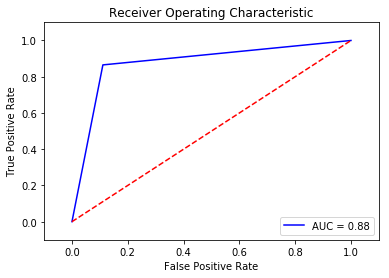

In [20]:
from sklearn import metrics
y_pred = clf.predict(X_test)

false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

C:\Users\Rajan\Anaconda2\envs\lendingClub\lib\site-packages\scikitplot\plotters.py:37: DeprecationWarning: This module was deprecated in version 0.3.0 and its functions are spread throughout different modules. Please check the documentation and update your function calls as soon as possible. This module will be removed in 0.4.0
  DeprecationWarning)
C:\Users\Rajan\Anaconda2\envs\lendingClub\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


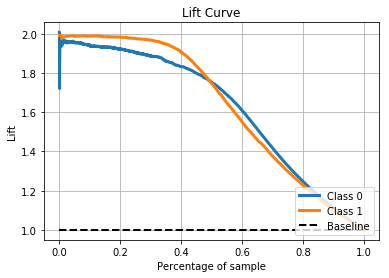

In [21]:
predicted_probas = clf.predict_proba(X_test)

import scikitplot as skplt
skplt.metrics.plot_lift_curve(y_test, predicted_probas)
plt.show()